# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [75]:
import pandas as pd

from sklearn.cluster import KMeans

In [76]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [77]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [78]:
# put your answer here
df.head(5)

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


5## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [79]:
# put your answer here
df.shape

(200, 5)

Show summary statistics using `describe()`. `(5 pts)`

In [80]:
# put your answer here
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [81]:
# put your answer here
df.isnull().sum()


,0
CustomerID,0
Genre,0
Age,0
AnnualIncome,0
SpendingScore,0


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [82]:
# put your answer here
features = df[["AnnualIncome", "SpendingScore"]]

Display the first 10 rows. `(5 pts)`

In [83]:
# put your answer here
df.head(10)

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

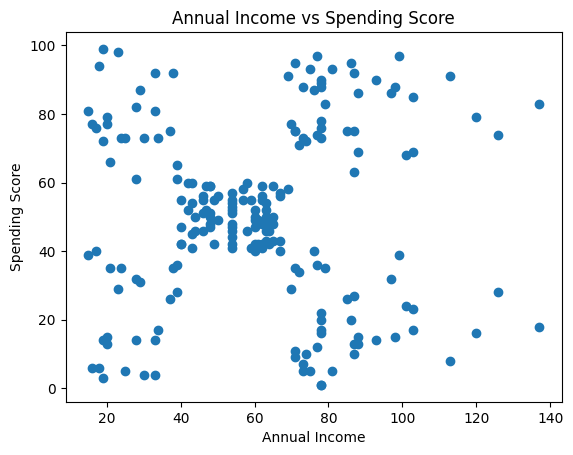

In [84]:
# put your answer here
import matplotlib.pyplot as plt

plt.scatter(features["AnnualIncome"], features["SpendingScore"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Annual Income vs Spending Score")
plt.show()

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

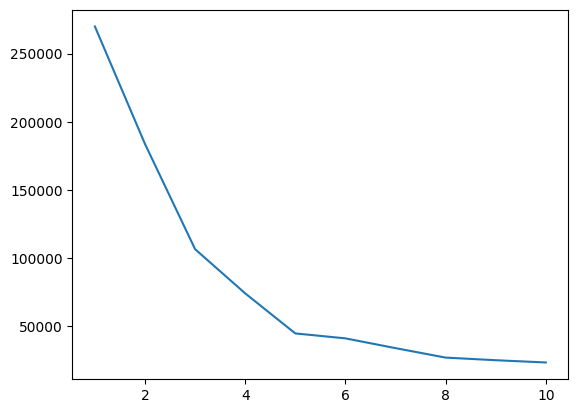

In [85]:
# put your answer here
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42, max_iter=300)
  kmeans.fit(features)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

Based from elbow method I beleive that 5 is the optimal K as its the point where the wcss slows reduction significantly

In [93]:
# put your answer here
kmeans_optimal = KMeans(n_clusters=5, init="k-means++", random_state=42, max_iter=500)
kmeans_optimal.fit(features)
kmeans_optimal.inertia_


44448.45544793369

## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

In [87]:
import numpy as np

pred_kmeans = kmeans_optimal.labels_
# Frequency count of the Output clusters
unique, counts = np.unique(pred_kmeans, return_counts=True)
dict(zip(unique, counts))

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


{np.int32(0): np.int64(81),
 np.int32(1): np.int64(39),
 np.int32(2): np.int64(22),
 np.int32(3): np.int64(35),
 np.int32(4): np.int64(23)}

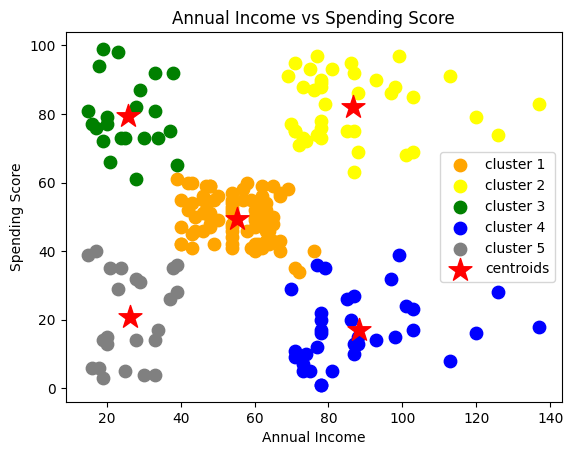

In [88]:
X = features.values
colors = ["orange", "yellow", "green", "blue", "gray"]

for cluster_id in range(5):
    plt.scatter(
        X[pred_kmeans == cluster_id, 0],
        X[pred_kmeans == cluster_id, 1],
        s=80,
        c=colors[cluster_id],
        label=f"cluster {cluster_id+1}"
    )

# Plot centroids
centroids = kmeans_optimal.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=300,
    c="red",
    marker="*",
    label="centroids"
)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Annual Income vs Spending Score")

plt.legend()
plt.show()

## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

1. They represent cluster 4
2. They represent cluster 3
3. clusters that have high spending scores and high income (i.e. cluster 2)
4. We could classify users with the above clusters to ger insights on their spending habbits based on spending score and annual income.

## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


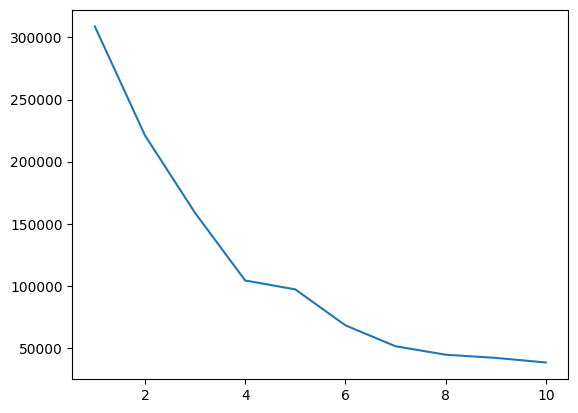

In [89]:
features_with_age = df[["Age", "AnnualIncome", "SpendingScore"]]

# put your answer here
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42, max_iter=300)
  kmeans.fit(features_with_age)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)

Based from elbow method it seems like 4 clusters is the optimal cluster

In [90]:
# put your answer here

kmeans_optimal_with_age = KMeans(n_clusters=4, init="k-means++", random_state=42, max_iter=500)
kmeans_optimal_with_age.fit(features_with_age)
kmeans.inertia_


38378.73890793209

Visualize using a 3D scatter plot. `(5 pts)`

In [91]:
# put your answer here
pred_kmean_with_age = kmeans_optimal_with_age.labels_

print(pred_kmean_with_age)

# Frequency count of the Output clusters
unique, counts = np.unique(pred_kmean_with_age, return_counts=True)
dict(zip(unique, counts))


[2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


{np.int32(0): np.int64(95),
 np.int32(1): np.int64(39),
 np.int32(2): np.int64(28),
 np.int32(3): np.int64(38)}

In [95]:
import plotly.graph_objects as go

X = features_with_age.values
centroids = kmeans_optimal_with_age.cluster_centers_

colors = ["orange", "yellow", "green", "blue"]

fig = go.Figure()

# Clusters
for cluster_id in range(4):
    fig.add_trace(go.Scatter3d(
        x=X[pred_kmean_with_age == cluster_id, 0],   # Age
        y=X[pred_kmean_with_age == cluster_id, 1],   # Income
        z=X[pred_kmean_with_age == cluster_id, 2],   # Score
        mode="markers",
        marker=dict(size=4, color=colors[cluster_id]),
        name=f"Cluster {cluster_id+1}"
    ))

# Centroids
fig.add_trace(go.Scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 2],
    mode="markers",
    marker=dict(size=10, color="red", symbol="x"),
    name="Centroids"
))

fig.update_layout(
    title="Interactive 3D K-Means Clusters",
    scene=dict(
        xaxis_title="Age",
        yaxis_title="Annual Income",
        zaxis_title="Spending Score"
    ),
    height=700
)

fig.show()


## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

Adding a another dimention(age) clearly shows that cluster 2-3 that the younger half of our dataset have the highest spending score.

Other clusters shows a good spread in relation to age. Cluster 1 have a weird shape because of the low means but we could also see that in that near centroid there is a set of data that is in the middle of the spending score. We could further

From this we could infer that we should prioritize advertisement to younger audiences since they have the highest spending score. We could also look into cluster 1 particularly the datapoints near the centroid of cluster one as its the next best thing after cluster 2-3